# Dynamic FC analyses of SUVA dataset

In [140]:
import sys

sys.path.append('/media/miplab-nas2/Data3/Nawal/Tools/Clinical/')
sys.path.append('/media/miplab-nas2/Data3/Nawal/Tools/iCAPs/')
from icap_consensus_clustering import ConsensusClustering
from icap_analyses import iCAPs
from clinical_analyses import ClinicalAnalyses

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nibabel as nib
import os.path
import json
import nibabel as nib

# Set numpy to print only 2 decimal digits for neatness
np.set_printoptions(precision=2, suppress=True)

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 0. Load configuration & patient data

In [136]:
with open('../config/dFC_config_patients_T3_QC+spicicap_C5toC7.json') as config_file:
    config = json.load(config_file)

In [435]:
patients = ClinicalAnalyses(config)

Creating instance for config patients_T3_QC+spicicap
overwrite_clinical: False


In [436]:
clinical_info = patients.get_patient_info()

Clinical information already extracted, loading from .pkl fike...
Done!


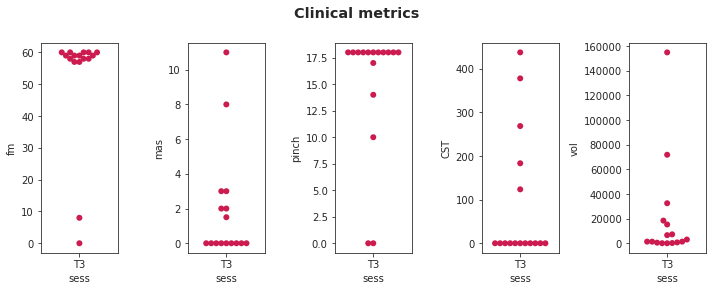

In [437]:
patients.plot_info(clinical_info,['fm','mas','pinch','CST','vol'])

## 1. iCAP analysis

### Define number of clusters

#### Instantiate consensus clustering object

In [438]:
consensus = ConsensusClustering(pathname=config['icap_root']+config['icap_folder'], k_range=config['k_range'], consname=config['cons_folder'])

#### Plot average consensus

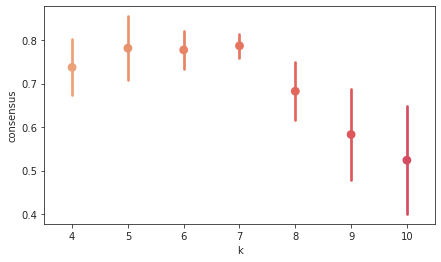

In [439]:
consensus.plot_avg_consensus()

$\Rightarrow$ From that, I focus on **K = 7**

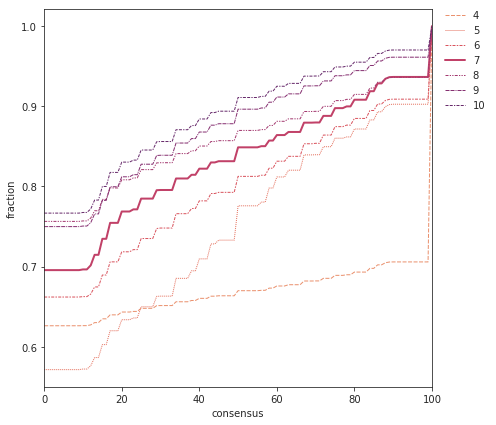

In [440]:
consensus.plot_cdf([7])

#### Display iCAPs

In [164]:
icaps_k7 = iCAPs(config,7)

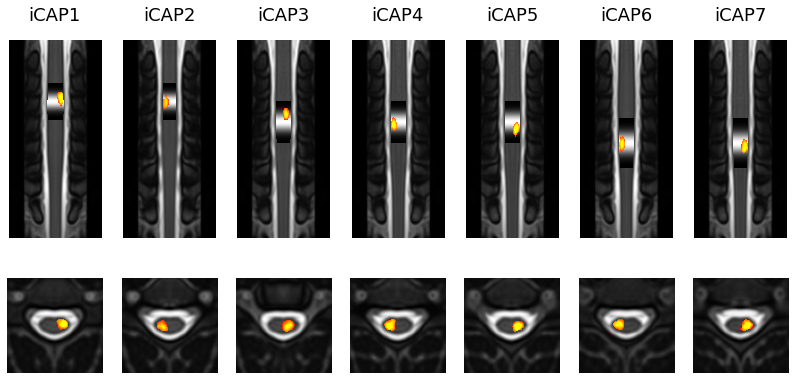

In [165]:
icaps_k7.plot(show_spinal_levels=True)

In [8]:
import glob

In [18]:
 levels_list = sorted(glob.glob(config['levels_path'] + 'spinal_level_*.nii.gz'))

In [27]:
icaps_k7.icap_data.shape[0:3]

(141, 141, 301)

In [37]:
levels_data = np.zeros((icaps_k7.icap_data.shape[0],icaps_k7.icap_data.shape[1],icaps_k7.icap_data.shape[2],len(levels_list)))

In [39]:
for lvl in range(0,len(levels_list)):
            level_img = nib.load(levels_list[lvl])
            levels_data[:,:,:,lvl] = level_img.get_fdata()

In [125]:
max_intensity = np.zeros(icaps_k7.icap_data.shape[3])
spinal_levels = np.zeros(icaps_k7.k)
for i in range(0,icaps_k7.k):
    max_intensity[i] = np.where(icaps_k7.icap_data == np.nanmax(icaps_k7.icap_data[:,:,:,i]))[2]
    # Take this point for each level (we focus on rostrocaudal position and take center of FOV for the other dimensions)
    level_vals = levels_data[levels_data.shape[0]//2,levels_data.shape[1]//2,int(max_intensity[i]),:]
    spinal_levels[i] = np.argsort(level_vals)[-1] # Take level with maximum values
    


In [126]:
spinal_levels

array([4., 4., 5., 5., 5., 6., 6.])

In [124]:
np.argsort?

In [518]:
durations_df = icaps_k7.extract_durations()

EXTRACT TEMPORAL CHARACTERISTICS
... Opening xlsx file
... Prepare subject info
... Format durations into a dataframe


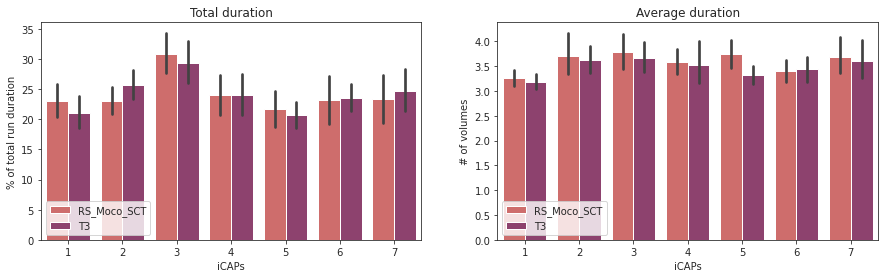

In [526]:
icaps_k7.plot_durations(durations_df)